In [32]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#F0=949*u.photon/u.second/u.cm**2/u.AA
F0=450*u.photon/u.second/u.cm**2/u.AA#nemati spreadsheets
z=3
mz=22
wavel=575*u.nm
bw=50*u.nm
QE_eff=.045*u.electron/u.photon*.55
X=1#0.7
Fz=F0*z*(10**(-mz/2.5))*np.pi**2*(X*wavel)**2*bw*QE_eff*(u.radian**2/u.arcsecond**2)
Fz.decompose()

<Quantity 0.036759083708911545 electron / s>

 $F_0 \  ( 10^{-m_{p}/2.5}) \  \pi(D/2)^2 \ \Delta\lambda \ \text{QE}_{eff}$

In [38]:
D=2.37*u.m
m_star=4.61

f_ratio=1e-9
m_p=-2.5*np.log10(f_ratio)
Fex=F0*(10**(-(m_p+m_star)/2.5))*np.pi**2*(D/2)**2*bw*QE_eff
Fex.decompose()

<Quantity 0.011053356247182518 electron / s>

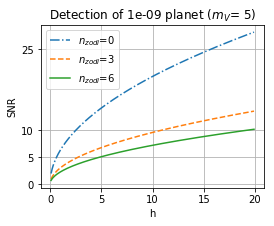

In [39]:
t=1*u.hour*np.arange(0.1,20,.1)
scale=2
plt.figure(figsize=[4,3])
ax=plt.subplot(111)
plt.plot(t,(Fex*t/np.sqrt((Fex)*t)).decompose(),"-.",
        label="$n_{zodi}$=%i"%(0))
plt.plot(t,(Fex*t/np.sqrt((Fex+Fz)*t)).decompose(),"--",
        label="$n_{zodi}$=%i"%(z))
#plt.plot(t,np.ones(t.size)*5,"--")

plt.plot(t,(Fex*t/np.sqrt((Fex+scale*Fz)*t)).decompose(),
        label="$n_{zodi}$=%i"%(scale*z))
ax.set_yticks([0,5,10,25])
plt.grid()


plt.xlabel(t.unit)
plt.ylabel("SNR")
plt.legend()
plt.title(r'Detection of %.0e planet ($m_{V}$= 5)'%(f_ratio))
plt.savefig("detection.pdf",bbox_inches="tight")

In [35]:
scale*z

6

In [ ]:
mz